<a href="https://colab.research.google.com/github/norm19art/BootcampDSAlura/blob/main/Challenge01/Robot_Trading_Bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Robot Trading Bitcoin USD** 🤖💻💲
### #aluralatam #aluraChallengeRobotTrading

*Este proyecto se encarga de desarrollar un Robot Trading capaz de tomar decisiones de compra y venta de Bitcoin USD en tiempo real.*


# Configuracion de entorno

In [55]:
# Declara las variables globales
# df_bitcoin almacena el histórico del precio del bitcoin de los últimos 7 días
# precio_actual almacena el precio actual del bitcoin en USD
# tendencia almacena la variación de la tendencia (alta o baja) del Bitcoin en la última hora
# medio_bitcoin almacena el promedio del precio del Bitcoin en USD
# algoritmo_decision almacena la recomendación del bot sobre el movimiento del Bitcoin (comprar, vender o esperar)
global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision

In [56]:
!python -V                                      # Obtiene la versión de Python instalada en el sistema
print('------')                                 # Imprime una línea de guiones para separar las salidas en la consola.
!pip show Pandas | grep 'Name\|Version'         # Obtiene información sobre el paquete Pandas instalado, incluyendo el nombre y la versión del paquete.
print('------')                                 # Imprime una línea de guiones para separar las salidas en la consola.
!pip show Numpy | grep 'Name\|Version'          # Obtiene información sobre el paquete Numpy instalado, incluyendo el nombre y la versión del paquete.
print('------')                                 # Imprime una línea de guiones para separar las salidas en la consola.
!pip show Matplotlib | grep 'Name\|Version'     # Obtiene información sobre el paquete Matplotlib instalado, incluyendo el nombre y la versión del paquete.

Python 3.10.12
------
Name: pandas
Version: 1.5.3
------
Name: numpy
Version: 1.23.5
------
Name: matplotlib
Version: 3.7.1


In [57]:
import pandas as pd                         # Importa la biblioteca Pandas y la renombra como "pd"
import yfinance as yf                       # Importa la biblioteca yfinance y la renombra como "yf"
import matplotlib.pyplot as plt             # Importa la biblioteca Matplotlib y la renombra como "plt"
from bs4 import BeautifulSoup               # Importa la clase BeautifulSoup del módulo bs4 para el análisis de HTML
import requests                             # Importa la biblioteca requests para hacer solicitudes HTTP

# Obtencion de datos

In [58]:
def importar_base_bitcoin():

  btc = yf.Ticker('BTC-USD')                                                        # Crea un objeto "btc" utilizando yfinance para rastrear información de Bitcoin en el par 'BTC-USD'
  df_bitcoin = btc.history(period='7d',interval='5m')                               # Obtiene datos históricos de Bitcoin para los últimos 7 días con intervalo de 5 minutos y los asigna a la variable "df_bitcoin"
  df_bitcoin = df_bitcoin.drop('Dividends', axis = 1)                               # Elimina la columna 'Dividends' del DataFrame "df_bitcoin"
  df_bitcoin = df_bitcoin.drop('Stock Splits', axis = 1)                            # Elimina la columna 'Stock Splits' del DataFrame "df_bitcoin"
  return df_bitcoin                                                                 # Retorna el DataFrame con los datos históricos de Bitcoin


In [59]:
def extraer_tendencias():

  # Precio actual del Bitcoin

  url = 'https://coinmarketcap.com/'                                                # Asigna la URL de CoinMarketCap a la variable "url"
  response = requests.get(url)                                                      # Realiza una solicitud HTTP GET a la URL y guarda la respuesta en la variable "response"
  soup = BeautifulSoup(response.content, features = 'lxml')                         # Utiliza BeautifulSoup para analizar el contenido HTML de la respuesta y guarda el resultado en "soup"
  value = soup.findAll('div',{'class':'sc-a0353bbc-0'})                             # Encuentra todos los elementos 'div' con la clase 'sc-a0353bbc-0' y los guarda en la lista "value"
  Bitcoin = value[0]                                                                # Obtiene el primer elemento de la lista "value" y lo asigna a la variable "Bitcoin"
  Bitcoin = Bitcoin.getText()                                                       # Obtiene el texto del elemento "Bitcoin" (Precio actual del Bitcoin USD) en formato texto
  precio_actual = float(Bitcoin.replace('$','').replace(',',''))                    # Convierte el texto en un número de punto flotante después de eliminar el símbolo de dólar y las comas
  print(f'Valor Bitcoin [$] -> {precio_actual}')                                    # Imprime el valor actual de Bitcoin

  # Obtención de tendencia en la última hora

  variacion = soup.findAll('span',{'class':'sc-d55c02b-0'})                         # Encuentra todos los elementos 'span' con la clase 'sc-d55c02b-0' y los guarda en la lista "variacion"
  variacion_bitcoin = variacion[0]                                                  # Obtiene el primer elemento (Bitcoin) de la lista "variacion" y lo asigna a "variacion_bitcoin"
  atributos = variacion_bitcoin.span.attrs                                          # Obtiene los atributos del elemento "span" dentro de "variacion_bitcoin" y los guarda en "atributos"
  if 'icon-Caret-up' in atributos['class']:                                         # Comprueba si la clase 'icon-Caret-up' está presente en los atributos de la etiqueta
    tendencia = 'alta'                                                              # Si la clase está presente, la tendencia se establece como 'alta'
    print(f'Tendencia en la última hora -> {tendencia}')                            # Imprime un mensaje indicando la tendencia
  else:
    tendencia = 'baja'                                                              # Si la clase no está presente, la tendencia se establece como 'baja'
    print(f'Tendencia en la última hora -> {tendencia}')                            # Imprime un mensaje indicando la tendencia

  return [precio_actual, tendencia]                                                 # Retorna una lista que contiene el precio actual y la tendencia (alta o baja)


# Limpieza de datos

In [60]:
def limpieza_datos():

  df_bitcoin_limpio = df_bitcoin.copy()                                                   # Crea una copia del DataFrame "df_bitcoin" y la asigna a "df_bitcoin_limpio"
  df_bitcoin_limpio = df_bitcoin_limpio.reset_index()                                     # Restablece el índice del DataFrame "df_bitcoin_limpio"
  df_bitcoin_limpio.drop_duplicates(subset=['Datetime'])                                  # Elimina filas duplicadas en función de la columna 'Datetime'
  df_bitcoin_limpio = df_bitcoin_limpio.dropna(subset = ['Close'])                        # Elimina filas con valores nulos en la columna 'Close' del DataFrame "df_bitcoin_limpio"
  df_indices_sin_cero = df_bitcoin_limpio[df_bitcoin_limpio['Volume'] == 0].index         # Encuentra los índices de filas donde el 'Volume' es igual a cero
  df_bitcoin_limpio = df_bitcoin_limpio.drop(df_indices_sin_cero)                         # Elimina las filas con 'Volume' igual a cero del DataFrame "df_bitcoin_limpio"
  # plt.boxplot(df_bitcoin_limpio['Close'])                                               # Genera un gráfico de caja para identificar outliers en la columna Close
  Q1 = df_bitcoin_limpio['Close'].quantile(.25)                                           # Calcula el primer cuartil de la columna 'Close' del DataFrame "df_bitcoin_limpio"
  Q3 = df_bitcoin_limpio['Close'].quantile(.75)                                           # Calcula el tercer cuartil de la columna 'Close' del DataFrame "df_bitcoin_limpio"
  IIQ = Q3 - Q1                                                                           # Calcula el rango intercuartil
  limite_inferior = Q1 - 1.5*IIQ                                                          # Calcula el límite inferior para identificar valores atípicos
  limite_superior = Q3 + 1.5*IIQ                                                          # Calcula el límite superior para identificar valores atípicos.
  seleccion = ((df_bitcoin_limpio['Close'] >= Q1) & (df_bitcoin_limpio['Close'] <= Q3))   # Crea una selección basada en el rango entre el primer y tercer cuartil
  df_bitcoin_limpio = df_bitcoin_limpio[seleccion]                                        # Filtra el DataFrame "df_bitcoin_limpio" para mantener solo las filas dentro de ese rango
  media_bitcoin = round(df_bitcoin_limpio['Close'].mean(),2)                              # Calcula la media de la columna 'Close' en el DataFrame "df_bitcoin_limpio"
  print(f'Media bitcoin [$] -> {media_bitcoin}')                                          # Imprime la media de Bitcoin


# Toma de decisiones

In [61]:
def tomar_decisiones():

  if (precio_actual >= media_bitcoin) & (tendencia == 'baja'):                              # Comprueba si el precio actual es mayor o igual a la media y la tendencia es 'baja'
    algoritmo_decision = 'Vender'                                                           # Si se cumple la condición, asigna 'Vender' a la variable "algoritmo_decision"
  elif (precio_actual < media_bitcoin) & (tendencia == 'alta'):                             # Comprueba si el precio actual es menor que la media y la tendencia es 'alta'
    algoritmo_decision = 'Comprar'                                                          # Si se cumple la condición, asigna 'Comprar' a la variable "algoritmo_decision"
  else:
    algoritmo_decision = 'Esperar'                                                          # Si no se cumple ninguna de las condiciones anteriores, asigna 'Esperar' a la variable "algoritmo_decision"


# Visualización

In [62]:
def visualizacion():

  df_bitcoin['Promedio'] = media_bitcoin                                                                # Agrega una nueva columna 'Promedio' al DataFrame "df_bitcoin" con el valor de la variable "media_bitcoin"
  plt.figure(figsize = (16,5), facecolor='black',edgecolor='black')                                     # Crea una figura de Matplotlib con un tamaño de 16x5 pulgadas, con fondo y borde negro
  plt.plot(df_bitcoin.index, df_bitcoin['Close'], label ='Precio', color = 'lime', alpha = 0.7)         # Grafica la serie de precios con etiqueta 'Precio', color verde 'lime' y transparencia
  plt.plot(df_bitcoin.index, df_bitcoin['Promedio'], label='Promedio', color = 'cyan', alpha = 0.7)     # Grafica la serie de promedio con etiqueta 'Promedio', color cian 'cyan' y transparencia
  plt.xlabel('Fecha [Año-Mes-Día]', color = 'lime', fontsize = 12, fontweight = 'bold')                 # Establece la etiqueta del eje x con color verde 'lime', tamaño de fuente 12 y en negrilla
  plt.ylabel('Valor [$]', color = 'lime', fontsize = 12, fontweight = 'bold')                           # Establece la etiqueta del eje x con color verde 'lime', tamaño de fuente 12 y en negrilla
  title_text = 'Robot Trading - Bitcoin'                                                                # Título del gráfico
  title_bbox = dict(boxstyle='round', edgecolor='black', facecolor='white')                             # Genera un diccionario con el estilo de la caja del título (redondeada, borde color negro y fondo blanco)
  title_font = {'color': 'black', 'fontsize': 15, 'fontweight': 'bold'}                                 # Diccionario con estilo del texto de título (color negro, tamaño de fuente 15 y negrilla)
  plt.title(title_text, fontdict=title_font, bbox=title_bbox)                                           # Establece el título del gráfico, asigna el estilo de texto y estilo de caja del título
  plt.xticks(color='white')                                                                             # Color de las marcas (valores) del eje x
  plt.yticks(color='white')                                                                             # Color de las marcas (valores) del eje y
  plt.gca().set_facecolor('black')                                                                      # Establece el fondo del gráfico color negro
  plt.grid(True, color='grey', linestyle='--', linewidth=0.5)                                           # Habilita la cuadrícula en el gráfico con color gris y estilo de linea segmentado
  if algoritmo_decision == 'Vender':                                                                                                                            # Verifica si la variable algoritmo_decision es 'Vender'
    highlighted_text = {'color': 'white', 'size': 20, 'weight': 'bold', 'bbox': {'facecolor': 'red', 'edgecolor': 'red', 'boxstyle': 'round,pad=0.5'}}          # Define un estilo de texto destacado con color blanco, tamaño 20, negrita y un cuadro rojo con borde rojo y estilo redondeado
    plt.annotate(f'{algoritmo_decision}', xy = (0.8,0.2), xycoords = 'axes fraction', xytext = (10,10), textcoords='offset points', **highlighted_text)         # Añade un texto "Vender" con el estilo definido a la ubicación especificada en el gráfico
  elif algoritmo_decision == 'Comprar':                                                                                                                         # Verifica si la variable algoritmo_decision es 'Comprar'
    highlighted_text = {'color': 'white', 'size': 20, 'weight': 'bold', 'bbox': {'facecolor': 'green', 'edgecolor': 'green', 'boxstyle': 'round,pad=0.5'}}      # Define un estilo de texto destacado con color blanco, tamaño 20, negrita y un cuadro verde con borde verde y estilo redondeado
    plt.annotate(f'{algoritmo_decision}', xy = (0.8,0.2), xycoords = 'axes fraction', xytext = (10,10), textcoords='offset points', **highlighted_text)         # Añade un texto "Comprar" con el estilo definido a la ubicación especificada en el gráfico
  else:                                                                                                                                                         # Si la decisión es 'Esperar' (o cualquier otra):
    highlighted_text = {'color': 'black', 'size': 20, 'weight': 'bold', 'bbox': {'facecolor': 'yellow', 'edgecolor': 'yellow', 'boxstyle': 'round,pad=0.5'}}    # Define un estilo de texto con color negro, tamaño 20, negrita y un cuadro amarillo con borde amarillo y estilo redondeado
    plt.annotate(f'{algoritmo_decision}', xy = (0.8,0.2), xycoords = 'axes fraction', xytext = (10,10), textcoords='offset points', **highlighted_text)         # Añade un texto "Esperar" con el estilo definido a la ubicación especificada en el gráfico
  plt.legend()                                                                                          # Muestra la leyenda en el gráfico.
  plt.show()                                                                                            # Muestra el gráfico con todas las anotaciones y la leyenda.


Valor Bitcoin [$] -> 34495.14
Tendencia en la última hora -> alta
Media bitcoin [$] -> 34339.66


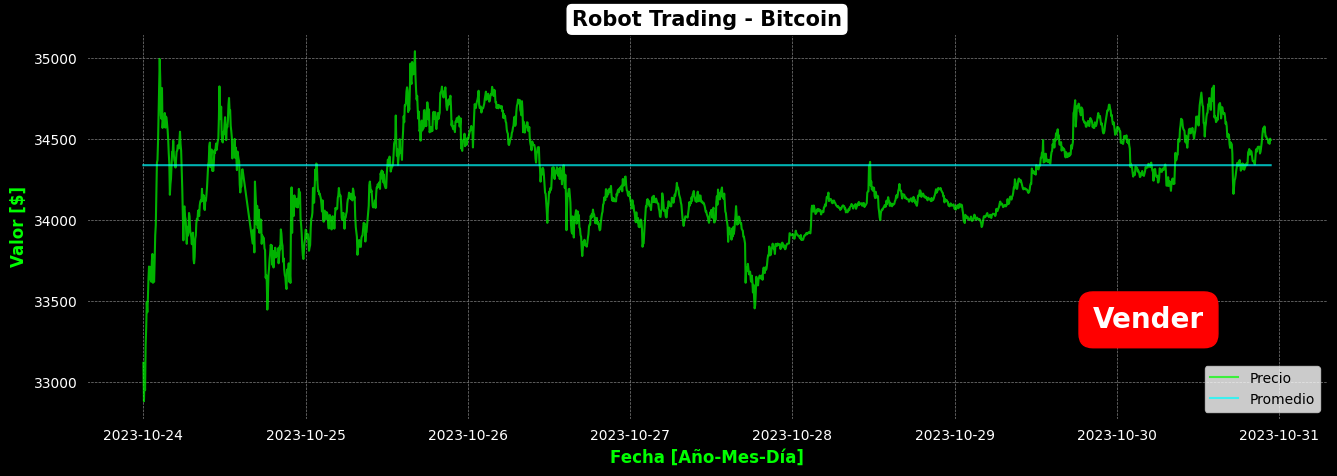

In [ ]:
from IPython.display import clear_output              # Importa la función clear_output de IPython para limpiar la salida de la celda
import time                                           # Importa el módulo time para controlar el tiempo y pausar la ejecución
while(True):                                          # Inicia un bucle infinito
  clear_output()                                      # Limpia la salida de la celda para actualizar la información en cada iteración
  importar_base_bitcoin()                             # Llama a la función importar_base_bitcoin() para obtener datos históricos de Bitcoin
  extraer_tendencias()                                # Llama a la función extraer_tendencias() para obtener la tendencia actual del precio de Bitcoin
  limpieza_datos()                                    # Llama a la función limpieza_datos() para limpiar y filtrar los datos de Bitcoin
  tomar_decisiones()                                  # Llama a la función tomar_decisiones() para tomar decisiones de compra o venta
  visualizacion()                                     # Llama a la función visualizacion() para mostrar un gráfico con la decisión tomada
  time.sleep(300)                                     # Pausa la ejecución del bucle durante 300 segundos (5 minutos) antes de la siguiente iteración
